# Teste Prático Ciência de dados Lighthouse


O projeto desenvolvido abaixo consiste em 5 etapas:

1. **Importação e Tratamento dos Dados**
   - Nesta etapa, é realizado a importação dos dados do github, verificando a presença de valores nulos e os tipos de cada variável.

2. **Análise Exploratória**
   - Exploração dos dados para obter insights iniciais, estatísticas descritivas e compreensão geral do conjunto de dados.

3. **Identificação das Regiões Mais Bem Avaliadas**
   - Analise os dados para identificar as regiões que apresentam maior quantidade de avaliações mensais, além do preço.

4. **Visualização de Correlações entre as Variáveis**
   - Utilização de um mapa de calor para identificar o grau de correlação entre algumas variáveis.

5. **Criação de um Modelo Regressivo para Inferência de Preços**
   - Nesta ultima etapa é realizada a construção de um modelo regressivo para inferir os preços da diária dos imóveis. Durante a construção é realizada a etapa de separação, treinamento e validação do modelo gerado.

Este projeto foi desenvolvido por Vitor Cabral, qualquer dúvida estou a disposição no linkedin https://www.linkedin.com/in/v%C3%ADtorcabral/ =) !



## Importação dados

In [89]:
# Utilizando o módulo Pandas para importar os dados para um dataframe
import pandas as pd

url = 'https://raw.githubusercontent.com/VitorCabrall/LH_CD_VITOR/d0a335657f40fe2f452d2190f02c02e36368d1d8/teste_indicium_precificacao.csv'

df = pd.read_csv(url)

In [90]:
df.head(3)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


## Análise exploratória

In [91]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


É possível identificar que há a presença de preços igual a 0 e disponibilidade igual a 0

In [92]:
# Quantidade de preços igual a 0
print(df[df["price"]<1].count().max())

11


In [93]:
# Removendo preços zerados
df = df[df["price"]>=1]

In [94]:
# Quantidade de disponibilidades igual a 0
df[df["disponibilidade_365"]<1].count().max()

17530

### Locais com disponibilidade igual a 0 não devem ser considerados para a aquisição de alugueis

### Distribuição dos preços:

<Axes: >

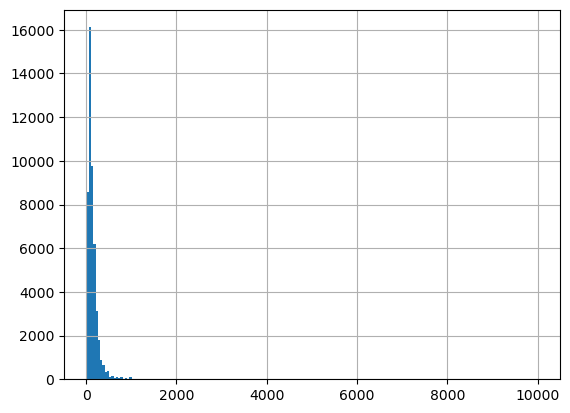

In [95]:
#Total
df['price'].hist(bins=200)

<Axes: >

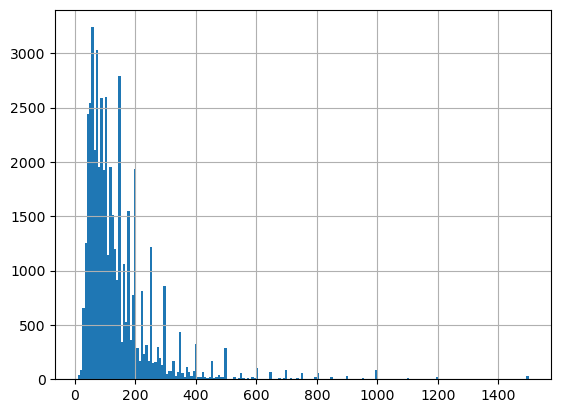

In [96]:
#Preço abaixo de 1500
df[df['price']<= 1500]["price"].hist(bins=200)

A maior concentração dos dados está na faixa de preço até R$ 400,00. Isso é um ponto de atenção durante o processo de treinamento do modelo pelo impacto dos outliers

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48883 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48883 non-null  int64  
 1   nome                           48867 non-null  object 
 2   host_id                        48883 non-null  int64  
 3   host_name                      48862 non-null  object 
 4   bairro_group                   48883 non-null  object 
 5   bairro                         48883 non-null  object 
 6   latitude                       48883 non-null  float64
 7   longitude                      48883 non-null  float64
 8   room_type                      48883 non-null  object 
 9   price                          48883 non-null  int64  
 10  minimo_noites                  48883 non-null  int64  
 11  numero_de_reviews              48883 non-null  int64  
 12  ultima_review                  38832 non-null  obje

A coluna ultima_review está com o tipo errado, sendo o correto:
- ultima_review:  object - >  datetime

Caso seja necessário trabalhar com esse dado abaixo, estarei realizando a mudança

### Indentificando valores nulos

In [98]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10051
reviews_por_mes                  10051
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [99]:
print("{:.2f}% dos dados de ultima_review e reviews_por_mes estão vazios".format(df["reviews_por_mes"].isnull().sum() * 100 / df["id"].count()))

20.56% dos dados de ultima_review e reviews_por_mes estão vazios


## Locais mais bem avaliados

In [100]:
## Tendo em vista que 20% dos dados estão vazios referente as reviews, irei retirar estes dados para poder calcular o locais com melhor avaliação

df_review = df[~df["reviews_por_mes"].isnull()]
df_review.isnull().sum()

id                                0
nome                              6
host_id                           0
host_name                        16
bairro_group                      0
bairro                            0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimo_noites                     0
numero_de_reviews                 0
ultima_review                     0
reviews_por_mes                   0
calculado_host_listings_count     0
disponibilidade_365               0
dtype: int64

In [101]:
# Identificando os tipos de imóveis

df_review['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [102]:
# Como o cliente está interassado em buscar um apartamento para alugar, iremos filtrar para apenas os tipo 'Entire home/apt'

df_review = df_review[df_review['room_type']=='Entire home/apt']

In [103]:
## Agrupando por região

df_avaliações_região = df_review[['bairro_group','reviews_por_mes','price']]\
    .groupby(['bairro_group'])\
        .mean()\
        .sort_values(by=['reviews_por_mes','price'],ascending=False)

df_avaliações_região

,reviews_por_mes,price
bairro_group,,
Bronx,2.238123,120.789644
Staten Island,2.074400,125.366667
Queens,1.967302,139.225603
Brooklyn,1.317773,171.270244
Manhattan,1.141610,230.190830


### Podemos observar que os apartamentos do Bronx possuem uma maior quantidade de reviews mensais e com um menor preço

## Identificando o melhor local disponível para alguel

In [104]:
# Somente podemos considerar locais onde a disponibilidade é maior que 1

df_review_disp = df_review[df_review['disponibilidade_365']>1]

In [105]:
df_avaliações_região_disp = df_review_disp[['bairro_group','reviews_por_mes','price']]\
    .groupby(['bairro_group'])\
        .mean()\
        .sort_values(by=['reviews_por_mes','price'],ascending=False)

df_avaliações_região_disp

,reviews_por_mes,price
bairro_group,,
Bronx,2.458037,120.922222
Queens,2.404122,145.417417
Staten Island,2.180444,123.296296
Brooklyn,1.784855,179.247701
Manhattan,1.534772,252.210936


In [106]:
df_review_disp[['bairro_group','nome','reviews_por_mes','price']].sort_values(by = ['reviews_por_mes','price'],ascending=[False,True]).head(5)


,bairro_group,nome,reviews_por_mes,price
36237,Queens,“For Heaven Cakes”,15.78,75
46936,Manhattan,★ AMAZING★ TIME SQUARE/ 2 Bedroom 3 Bed Apart...,14.00,500
44280,Brooklyn,2 bed.Full apartment. L Train.15 min away from...,13.33,99
25248,Queens,Private Guest Suite Less than 10 min to JFK :),13.27,50
37092,Queens,Beautiful furnished private studio with backyard,13.11,20


### A área do Bronx, em média, é a área com o melhor preço e maior quantidade de avaliações mensais, entre os locais com disponibilidade para alguel

### Os locais com maiores avaliações são:

In [107]:
df_review_disp[['bairro_group','nome','reviews_por_mes','price']].sort_values(by = ['reviews_por_mes','price'],ascending=[False,True]).head(5)

,bairro_group,nome,reviews_por_mes,price
36237,Queens,“For Heaven Cakes”,15.78,75
46936,Manhattan,★ AMAZING★ TIME SQUARE/ 2 Bedroom 3 Bed Apart...,14.00,500
44280,Brooklyn,2 bed.Full apartment. L Train.15 min away from...,13.33,99
25248,Queens,Private Guest Suite Less than 10 min to JFK :),13.27,50
37092,Queens,Beautiful furnished private studio with backyard,13.11,20


## Identificando a correlação entre as variáveis 

In [108]:
# Gerando correlação entre as variáveis
correlação = df[['price','minimo_noites','disponibilidade_365']].corr()

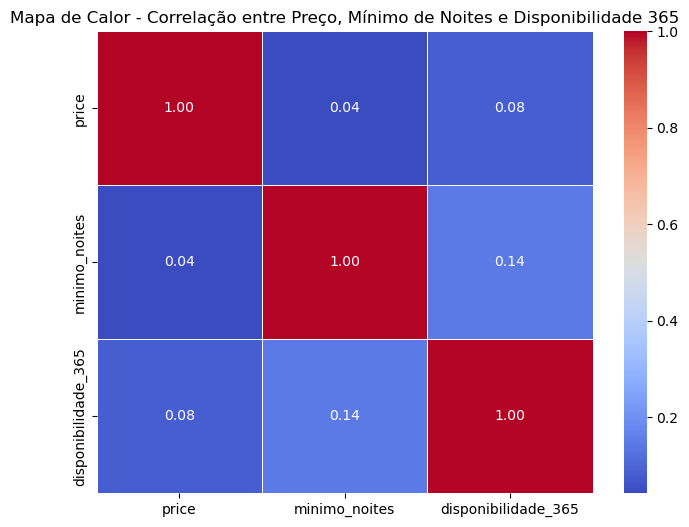

In [109]:
# Plotando gráfico de calor sobre as correlações entre as variáveis
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlação, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Preço, Mínimo de Noites e Disponibilidade 365')
plt.show()

### Há um correlação positiva entre mínimo de noites, disponibilidade 365 e preço, porém o valor é baixo, indicando uma leve relação

# Realizando previsões de preços

## Seleção e preparação das variáveis

Váriaveis escolhidas para treinamento do modelo:

    - bairro                      
    - room_type                         
    - price                             
    - minimo_noites                     
    - numero_de_reviews 
    - reviews_por_mês                
    - calculado_host_listings_count     
    - disponibilidade_365               

### As variáveis "Bairro group" e " Room_type" são categóricas, sendo necessário realizar o processo de dummies adicionando um valor de 0 ou 1 para cada categoria

In [110]:
Df_previsão= df[~df["reviews_por_mes"].isnull()]
Df_previsão = Df_previsão[['bairro_group','room_type','price','minimo_noites','numero_de_reviews','calculado_host_listings_count','disponibilidade_365',"reviews_por_mes"]]
Df_previsão = pd.get_dummies(Df_previsão).astype(float)

In [111]:
Df_previsão.head(3)

,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,reviews_por_mes,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,225.0,1.0,45.0,2.0,355.0,0.38,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,89.0,1.0,270.0,1.0,194.0,4.64,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,80.0,10.0,9.0,1.0,0.0,0.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [112]:
# Verificando se possui alguma informação vazia

Df_previsão.isnull().sum()

price                            0
minimo_noites                    0
numero_de_reviews                0
calculado_host_listings_count    0
disponibilidade_365              0
reviews_por_mes                  0
bairro_group_Bronx               0
bairro_group_Brooklyn            0
bairro_group_Manhattan           0
bairro_group_Queens              0
bairro_group_Staten Island       0
room_type_Entire home/apt        0
room_type_Private room           0
room_type_Shared room            0
dtype: int64

In [113]:
Df_previsão[Df_previsão["price"]>=650].count()[0]

430

Apenas 323 dados com preço acima de R$650 estão no conjunto. Visando melhorar a qualidade do modelo, será removido os outliers 

In [114]:
Df_previsão = Df_previsão[Df_previsão["price"]<=650]

## Separação de dados para treino e teste

In [115]:
# Valor alvo
y = Df_previsão['price']

# Variáveis de treino
X = Df_previsão.drop(columns=['price'])

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7,
                                                    random_state = 19) 

## Criação do modelo

### Por se tratar de um modelo de inferência de uma variável númerica, iremos utilizar um modelo de Regressão.

 Um modelo de árvores como RandomForest Regressor, no cenário médio, trará um bom treinamento sobre este tipo de problema. Porém modelos baseados em árvores, sem uma limitação podem acabar tendo um overfitting sobre os dados de treino.

Para esse exemplo irei estar realizando a técnica ensemble stacking com a combinação de dois modelos:
 - AdaBoostRegressor
 - Linear Regression

O AdaBoostRegressor trará um modelo de árvores adaptativo, corrigindo os pesos a cada iteração. Já o Linear Regression, será utilizado para lidar com valores que estão fora do range do treinamento do modelo de árvore, evitando valores "estourados" quando um imóvel tiver caracteristicas para um preço superior a R$650.

Para a escolha dos melhores parâmetros de cada modelo, irei utilizar a técnica GridSearch que identifica a combinação que tem o menor valor de erro.

In [117]:
# Importando bibliotecas
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

In [118]:
# Declarando os modelos
adaboost = AdaBoostRegressor()
linear_reg = LinearRegression()

In [119]:
# Definindo parâmetros para o GridSearch

parametros_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

#Utilizando o erro quadrático médio como validador e cross validation de 5 partições
grid_search_adaboost = GridSearchCV(adaboost, parametros_adaboost, scoring='neg_mean_squared_error', cv= 5)


In [120]:
# Treinando os modelos

Modelo_linear_reg = linear_reg.fit(X_train,y_train)
grid_search_adaboost.fit(X_train,y_train)
Modelo_melhor_adaboost = grid_search_adaboost.best_estimator_

In [121]:
# Criando o ensemble Stacking Regressor, juntando os 2 modelo e utilizando o Modelo_linear_reg como validador final

ensemble = StackingRegressor(
    estimators=[
        ('adaboost', Modelo_melhor_adaboost),
        ('linear_reg', Modelo_linear_reg)
    ],
    final_estimator=LinearRegression()
)

#Treinando modelo
ensemble.fit(X_train, y_train)

StackingRegressor(estimators=[('adaboost',
                               AdaBoostRegressor(learning_rate=0.01)),
                              ('linear_reg', LinearRegression())],
                  final_estimator=LinearRegression())

## Validando Modelo
Para validar o modelo estaremos comparando o seu erro médio quadrado

In [122]:
from sklearn.metrics import mean_squared_error
import numpy as np 

previsões_test = ensemble.predict(X_test)
previsões_treino = ensemble.predict(X_train)

In [123]:
mse_treino = mean_squared_error(y_train, previsões_treino)
mse_teste= mean_squared_error(y_test, previsões_test)

print(f'Erro médio dos dados de treino pelo modelo Ensemble Stacking: R${np.sqrt(mse_treino).round(2)}')
print(f'Erro médio dos dados de teste pelo modelo Ensemble Stacking: R${np.sqrt(mse_teste).round(2)}')


Erro médio dos dados de treino pelo modelo Ensemble Stacking: R$71.89
Erro médio dos dados de teste pelo modelo Ensemble Stacking: R$71.8


In [124]:
for i in range(50,60):
    print('Valor predito R${:.2f}, Valor Real R${:.2f}'.format(
        ensemble.predict(X_test.iloc[i].to_frame().transpose())[0],
        y_test.iloc[i]
    ))

Valor predito R$43.77, Valor Real R$30.00
Valor predito R$188.71, Valor Real R$185.00
Valor predito R$155.46, Valor Real R$146.00
Valor predito R$101.67, Valor Real R$123.00
Valor predito R$96.94, Valor Real R$65.00
Valor predito R$96.51, Valor Real R$80.00
Valor predito R$60.37, Valor Real R$47.00
Valor predito R$147.18, Valor Real R$254.00
Valor predito R$108.26, Valor Real R$150.00
Valor predito R$63.69, Valor Real R$65.00


## Testando dado fornecido

In [125]:
dados = pd.DataFrame({
    'id': [2595],
    'nome': ['Skylit Midtown Castle'],
    'host_id': [2845],
    'host_name': ['Jennifer'],
    'bairro_group': ['Manhattan'],
    'bairro': ['Midtown'],
    'latitude': [40.75362],
    'longitude': [-73.98377],
    'room_type': ['Entire home/apt'],
    'price': [225],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'ultima_review': ['2019-05-21'],
    'reviews_por_mes': [0.38],
    'calculado_host_listings_count': [2],
    'disponibilidade_365': [355]
})

In [126]:
def prever_valor(df, model, estrutura):

    df = df[['bairro_group', 'room_type', 'price', 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365', 'reviews_por_mes']]
    df = pd.get_dummies(df).astype(float)
    df_predict = df.drop(columns="price")

    nova_linha = pd.Series(0, index=estrutura.columns)
    nova_linha[df_predict.columns] = df_predict.iloc[0]
    
    # Criar uma cópia do DataFrame estrutura antes de fazer alterações
    estrutura_copia = estrutura.copy()
    
    # Adicionar a nova linha usando loc na cópia
    estrutura_copia.loc[len(estrutura)] = nova_linha

    previsão = model.predict(estrutura_copia)
    print('Valor predito R${:.2f}, Valor Real R${:.2f}'.format(
        previsão[0],
        df["price"].iloc[0]
    ))


In [127]:
prever_valor(dados,ensemble,X_test.head(0))

Valor predito R$225.83, Valor Real R$225.00


### O modelo gerado conseguiu prever um valor aproximado (R$ 225,83) em relação ao real (R$ 225,00) com uma margem de erro de R$ 0,83

### Para utilização em produção do modelo, seria necessário a realização de mais testes, junto a montagem do pipeline e calibração dos parâmetros, antes de realizar o deploy via docker em um ambiente de nuvem.

In [132]:
# Salvar Modelo

"""import pickle
with open("modelo.pkl", "wb") as f:
    pickle.dump(ensemble, f) """

In [141]:
"""# Instalar bibliotecas
!pip install -r requirements.txt """

In [ ]:
"""# Rodar modelo

import pickle

# Carregar o modelo
with open("modelo.pkl", "rb") as f:
    model = pickle.load(f)

# Fazer previsões

# Utilizando a função 
prever_valor(dados,model,X_test.head(0)) """